In [936]:
#!pip install missingno
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
from sklearn.tree import DecisionTreeClassifier

In [937]:
train = pd.read_csv("train_fix1.csv")
test = pd.read_csv("test_fix1.csv")

In [938]:
test = pd.read_csv("test_fix1.csv")

In [939]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Discount_offered     3468 non-null   float64
 8   Weight_in_gms        6553 non-null   float64
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 546.9+ KB


In [940]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  3144 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Discount_offered     2085 non-null   float64
 8   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 281.4+ KB


# Weight_in_gms  ? 를 중앙값으로 변경


In [941]:
train['Weight_in_gms'] = train['Weight_in_gms'].replace('?', 4189.0)
test['Weight_in_gms'] = test['Weight_in_gms'].replace('?', 4189.0)


In [942]:
# 'Weight_in_gms' 열의 결측치를 4189로 채우기
train['Weight_in_gms'].fillna(4189, inplace=True)
test['Weight_in_gms'].fillna(4189, inplace=True)

In [943]:
train['Weight_in_gms']
test['Weight_in_gms']

0         4352
1         1056
2         5383
3         1880
4         5174
5       4189.0
6         5236
7         1317
8         1934
9         1005
10        4689
11        4415
12        4533
13        3710
14        1482
15        5250
16        1174
17        1784
18        4892
19        4723
20        4321
21        5264
22        3443
23        1060
24      4189.0
25        4065
26        4486
27        1588
28        5843
29        1518
30        1674
31      4189.0
32        5178
33        2620
34        4971
35        5365
36        5186
37        4645
38        1248
39        1009
40        5113
41        1347
42        1183
43        5610
44        5352
45        3393
46        4163
47        3844
48        1942
49        3375
50        1833
51      4189.0
52        4575
53        4523
54        1116
55        4254
56        5682
57        5894
58        4691
59        5464
60        1145
61        4219
62        4660
63        3578
64        5288
65        5900
66        

In [944]:
train['Weight_in_gms'] = train['Weight_in_gms'].astype('int64')
test['Weight_in_gms'] = train['Weight_in_gms'].astype('int64')


In [945]:
# 'Weight_in_gms' 열의 값을 100의 배수로 변경합니다.
train['Weight_in_gms'] = ((train['Weight_in_gms'] - 1) // 100 + 1) * 100
test['Weight_in_gms'] = ((test['Weight_in_gms'] - 1) // 100 + 1) * 100


# Discount_offered 의 결측치 75% 는 10으로 나머지는 11로 변경
- 10은 제때 배송이 이루어지지 않을 수 있고 11은 무조건 제때 배송이 되는 것  
- 트레인 데이터의 75% 가 10으로 제때 배송이 될지 않될지 모르지만 11인 무조건 배송이 완료됨  
- 나 취한다

In [946]:
# '?' 값을 NaN으로 대체
train['Discount_offered'].replace('?', np.nan, inplace=True)
test['Discount_offered'].replace('?', np.nan, inplace=True)

# 75% 분위수 계산
q75 = train['Discount_offered'].quantile(0.75)
q75 = test['Discount_offered'].quantile(0.75)

# '?' 값을 75% 분위수 값으로 변경
train['Discount_offered'].fillna(q75, inplace=True)
test['Discount_offered'].fillna(q75, inplace=True)

# 결측치를 75%는 10으로, 25%는 11로 채우기
q75 = train['Discount_offered'].quantile(0.75)
q25 = train['Discount_offered'].quantile(0.25)
q75 = test['Discount_offered'].quantile(0.75)
q25 = test['Discount_offered'].quantile(0.25)

train['Discount_offered'].fillna(10, limit=int(0.75 * len(train)), inplace=True)
train['Discount_offered'].fillna(11, limit=int(0.25 * len(train)), inplace=True)

test['Discount_offered'].fillna(10, limit=int(0.75 * len(train)), inplace=True)
test['Discount_offered'].fillna(11, limit=int(0.25 * len(train)), inplace=True)


In [947]:
train['Discount_offered'].info()
test['Discount_offered'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: Discount_offered
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: Discount_offered
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [948]:
train['Discount_offered'].describe()

count    6999.000000
mean       11.619803
std        11.428752
min         1.000000
25%         7.000000
50%        10.000000
75%        10.000000
max        65.000000
Name: Discount_offered, dtype: float64

In [949]:
train['Discount_offered'] = train['Discount_offered'].astype('int64')
test['Discount_offered'] = test['Discount_offered'].astype('int64')


In [950]:
train['Discount_offered'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: Discount_offered
Non-Null Count  Dtype
--------------  -----
6999 non-null   int64
dtypes: int64(1)
memory usage: 54.8 KB


In [951]:
test['Discount_offered'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: Discount_offered
Non-Null Count  Dtype
--------------  -----
4000 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


# Prior_purchases 결측치 랜덤하게

In [952]:
train['Prior_purchases'].describe()

count    6049.000000
mean        3.576294
std         1.530933
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Prior_purchases, dtype: float64

In [953]:
# 결측치를 75%는 4로, 25%는 3으로 랜덤하게 채우기
np.random.seed(0)  # 재현 가능한 결과를 위해 시드 설정

# 결측치 인덱스 추출
missing_indexes = train[train['Prior_purchases'].isna()].index
missing_indexes_1 = test[test['Prior_purchases'].isna()].index


# 75%는 4로, 25%는 3으로 랜덤하게 결측치 채우기
num_missing = len(missing_indexes)
num_missing_1 = len(missing_indexes_1)

num_4 = int(0.75 * num_missing)
num_4_1 = int(0.75 * num_missing_1)

num_3 = num_missing - num_4
num_3_1 = num_missing_1 - num_4_1

values_to_fill = [4] * num_4 + [3] * num_3
values_to_fill_1 = [4] * num_4_1 + [3] * num_3_1

# 결측치 채우기
np.random.shuffle(values_to_fill)
np.random.shuffle(values_to_fill_1)

train.loc[missing_indexes, 'Prior_purchases'] = values_to_fill
test.loc[missing_indexes_1, 'Prior_purchases'] = values_to_fill_1

In [954]:
train['Prior_purchases'] = train['Prior_purchases'].astype('int64')
test['Prior_purchases'] = test['Prior_purchases'].astype('int64')


이게 되네

# Customer_care_calls 결측치 랜덤하게 


In [955]:
train['Customer_care_calls'].describe()

count    5423.000000
mean        4.054582
std         1.131019
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Customer_care_calls, dtype: float64

In [956]:
# 결측치를 75%는 4로, 25%는 3으로 랜덤하게 채우기
np.random.seed(0)  # 재현 가능한 결과를 위해 시드 설정

# 결측치 인덱스 추출
missing_indexes = train[train['Customer_care_calls'].isna()].index
missing_indexes_1 = test[test['Customer_care_calls'].isna()].index

# 75%는 5로, 25%는 4으로 랜덤하게 결측치 채우기
num_missing = len(missing_indexes)
num_missing_1 = len(missing_indexes_1)

num_5 = int(0.75 * num_missing)
num_5_1 = int(0.75 * num_missing_1)

num_4 = num_missing - num_5
num_4_1 = num_missing_1 - num_5_1

values_to_fill = [5] * num_5 + [4] * num_4
values_to_fill_1 = [5] * num_5_1 + [4] * num_4_1

# 결측치 채우기
np.random.shuffle(values_to_fill)
np.random.shuffle(values_to_fill_1)

train.loc[missing_indexes, 'Customer_care_calls'] = values_to_fill
test.loc[missing_indexes_1, 'Customer_care_calls'] = values_to_fill_1

In [957]:
train['Customer_care_calls'] = train['Customer_care_calls'].astype('int64')
test['Customer_care_calls'] = test['Customer_care_calls'].astype('int64')

# 원핫 인코딩 범주형 데이터 처리

In [958]:
train.select_dtypes(include=['object'])

,Warehouse_block,Mode_of_Shipment,Product_importance
0,C,Ship,high
1,F,Flight,high
2,F,Ship,high
3,F,Ship,medium
4,D,Flight,low
5,B,Ship,high
6,A,Ship,high
7,F,Flight,high
8,F,Ship,high
9,C,Ship,high


In [959]:
(train['Product_importance'] == '?').sum()

97

In [960]:
# '?' 값을 대체하기 위한 비율 설정
high_ratio = 0.14
medium_ratio = 0.45
low_ratio = 0.40

# 랜덤으로 값을 선택하여 '?' 값 대체
np.random.seed(0)  # 재현 가능한 결과를 위해 시드 설정

# '?' 값을 대체하는 함수 정의
def replace_question_mark():
    rand_val = np.random.rand()
    if rand_val < high_ratio:
        return 'high'
    elif rand_val < high_ratio + medium_ratio:
        return 'medium'
    else:
        return 'low'

# '?' 값을 랜덤하게 대체
question_mark_indexes = train[train['Product_importance'] == '?'].index
question_mark_indexes_1 = test[test['Product_importance'] == '?'].index

train.loc[question_mark_indexes, 'Product_importance'] = [replace_question_mark() for _ in question_mark_indexes]
test.loc[question_mark_indexes_1, 'Product_importance'] = [replace_question_mark() for _ in question_mark_indexes_1]


In [961]:
# 원핫 인코딩
one_hot_train = pd.get_dummies(train)

one_hot_test = pd.get_dummies(test)


In [962]:
one_hot_train.info()
one_hot_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        6999 non-null   int64
 1   Customer_rating            6999 non-null   int64
 2   Cost_of_the_Product        6999 non-null   int64
 3   Prior_purchases            6999 non-null   int64
 4   Discount_offered           6999 non-null   int64
 5   Weight_in_gms              6999 non-null   int64
 6   Reached.on.Time_Y.N        6999 non-null   int64
 7   Warehouse_block_A          6999 non-null   uint8
 8   Warehouse_block_B          6999 non-null   uint8
 9   Warehouse_block_C          6999 non-null   uint8
 10  Warehouse_block_D          6999 non-null   uint8
 11  Warehouse_block_F          6999 non-null   uint8
 12  Mode_of_Shipment_?         6999 non-null   uint8
 13  Mode_of_Shipment_Flight    6999 non-null   uint8
 14  Mode_of_Shipment_Road   

# Mode_of_Shipment_?
- 373개가 정답데이터
- 100 퍼센트 정답인곳에 373개 넣고
- 100 퍼센트 오답인곳에 6626을 넣자

In [963]:
one_hot_train['Mode_of_Shipment_?']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      1
61      0
62      0
63      0
64      0
65      0
66      0
67      1
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      1
98      0
99      0


In [964]:
# 'Reached.on.Time_Y.N' 값이 1인 행의 개수 구하기
count_of_ones = (one_hot_train['Mode_of_Shipment_?'] == 1) & (one_hot_train['Reached.on.Time_Y.N'] == 1)
count = count_of_ones.sum()

# 결과 출력
print(f"'Mode_of_Shipment_?' 열에서 'Reached.on.Time_Y.N' 값이 1인 행의 개수: {count}")

'Mode_of_Shipment_?' 열에서 'Reached.on.Time_Y.N' 값이 1인 행의 개수: 199


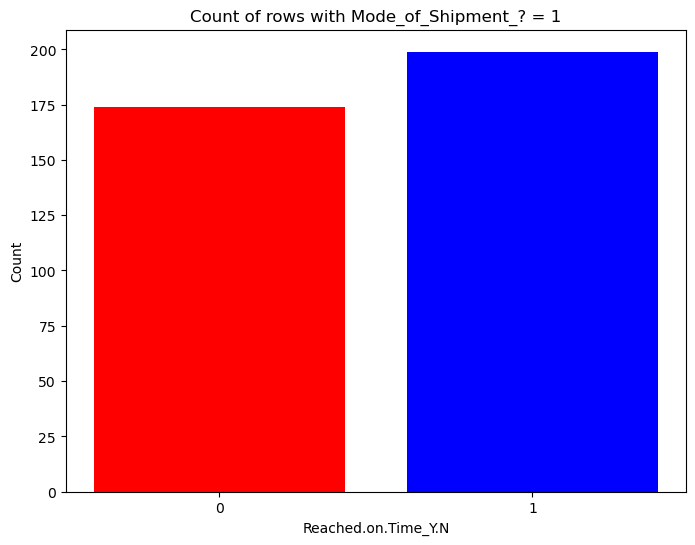

In [965]:
import matplotlib.pyplot as plt

# 'Mode_of_Shipment_?' 열에서 'Reached.on.Time_Y.N' 값이 0인 행의 개수 계산
count_of_zeros = (one_hot_train['Mode_of_Shipment_?'] == 1) & (one_hot_train['Reached.on.Time_Y.N'] == 0)
count_zeros = count_of_zeros.sum()

# 'Mode_of_Shipment_?' 열에서 'Reached.on.Time_Y.N' 값이 1인 행의 개수 계산
count_of_ones = (one_hot_train['Mode_of_Shipment_?'] == 1) & (one_hot_train['Reached.on.Time_Y.N'] == 1)
count_ones = count_of_ones.sum()

# 그래프 생성
categories = ['0', '1']
counts = [count_zeros, count_ones]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['red', 'blue'])
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel('Count')
plt.title('Count of rows with Mode_of_Shipment_? = 1')
plt.show()


In [966]:
tree_model = DecisionTreeClassifier()
y_train= one_hot_train['Reached.on.Time_Y.N']
X_train = one_hot_train.drop('Reached.on.Time_Y.N', axis=1)
X_test = one_hot_test

In [967]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        4000 non-null   int64
 1   Customer_rating            4000 non-null   int64
 2   Cost_of_the_Product        4000 non-null   int64
 3   Prior_purchases            4000 non-null   int64
 4   Discount_offered           4000 non-null   int64
 5   Weight_in_gms              4000 non-null   int64
 6   Warehouse_block_A          4000 non-null   uint8
 7   Warehouse_block_B          4000 non-null   uint8
 8   Warehouse_block_C          4000 non-null   uint8
 9   Warehouse_block_D          4000 non-null   uint8
 10  Warehouse_block_F          4000 non-null   uint8
 11  Mode_of_Shipment_?         4000 non-null   uint8
 12  Mode_of_Shipment_Flight    4000 non-null   uint8
 13  Mode_of_Shipment_Road      4000 non-null   uint8
 14  Mode_of_Shipment_Ship   

In [968]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        6999 non-null   int64
 1   Customer_rating            6999 non-null   int64
 2   Cost_of_the_Product        6999 non-null   int64
 3   Prior_purchases            6999 non-null   int64
 4   Discount_offered           6999 non-null   int64
 5   Weight_in_gms              6999 non-null   int64
 6   Warehouse_block_A          6999 non-null   uint8
 7   Warehouse_block_B          6999 non-null   uint8
 8   Warehouse_block_C          6999 non-null   uint8
 9   Warehouse_block_D          6999 non-null   uint8
 10  Warehouse_block_F          6999 non-null   uint8
 11  Mode_of_Shipment_?         6999 non-null   uint8
 12  Mode_of_Shipment_Flight    6999 non-null   uint8
 13  Mode_of_Shipment_Road      6999 non-null   uint8
 14  Mode_of_Shipment_Ship   

In [969]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: Reached.on.Time_Y.N
Non-Null Count  Dtype
--------------  -----
6999 non-null   int64
dtypes: int64(1)
memory usage: 54.8 KB


In [970]:
tree_model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [971]:
tree_model.score(X_train,y_train)

1.0

In [972]:
tree_model1 = DecisionTreeClassifier(max_leaf_nodes=900,max_depth=28)
tree_model1

DecisionTreeClassifier(max_depth=28, max_leaf_nodes=900)

In [973]:
tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=28, max_leaf_nodes=900)

In [974]:
tree_model1.score(X_train, y_train)

0.9125589369909987

In [975]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_model1, X_train, y_train, cv=5)
np.mean(score)

0.628805166955989

In [976]:
param = {'max_depth': [10 ],  # max_depth 값을 리스트로 감싸줌
         'max_features': [8],
         'min_samples_leaf': [30],
         'n_estimators': [110]}


In [977]:
# 모델 꺼내오기  
from sklearn.ensemble import RandomForestClassifier

# a모델 생성 - 이번엔 기본값으로 생성할거임
rforest_model2 = RandomForestClassifier(random_state=10)



In [978]:
# 교차검증 
from sklearn.model_selection import cross_val_score

# 모델 학습 - (cv = 5)
score = cross_val_score(rforest_model, X_train, y_train, cv=5)


#  결과 확인  
score
score.mean()

0.6496669049320943

In [979]:
# 그리드서치CV() 함수 꺼내오기
# GridSearchCV()

from sklearn.model_selection import GridSearchCV

# 모델 선언
grid = GridSearchCV(rforest_model2, param, cv=5, verbose=3)
# verbose : 학습하는 과정을 확인

In [980]:
# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid = GridSearchCV(rforest_model2, param, cv=5, verbose=3)
grid.fit(X_train, y_train)

# 최적의 모델을 best_model 변수에 저장
rforest_model2 = grid.best_estimator_

# 학습
rforest_model2.fit(X_train, y_train)

# 예측
pre = rforest_model2.predict(X_test)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.681 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.668 total time=   0.4s
[CV 3/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.673 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.674 total time=   0.4s
[CV 5/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.705 total time=   0.4s


In [981]:
grid.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 30,
 'n_estimators': 110}

In [982]:
#  검색 최종

# 최적의 모델 rforest_model2을 사용하여 교차 검증 수행 (cv=9)
scores = cross_val_score(rforest_model2, X_train, y_train, cv=9)

# 교차 검증 결과 확인
print("각 폴드의 점수:", scores)
print("평균 점수:", scores.mean())


각 폴드의 점수: [0.67737789 0.65424165 0.65938303 0.67866324 0.65809769 0.67609254
 0.67310167 0.67696268 0.70785071]
평균 점수: 0.6735301221162403


In [983]:
# 교차검증 
from sklearn.model_selection import cross_val_score

# 모델 학습 - (cv = 5)
score = cross_val_score(rforest_model2, X_train, y_train, cv=9)


#  결과 확인  
score
score.mean()

0.6735301221162403

In [984]:
# 모델 학습
result_rf_model=rforest_model2.fit(X_train, y_train)

In [985]:
# 예측 해보기
pre = rforest_model2.predict(X_test)
pre

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [986]:
result = pd.read_csv('./sampleSubmission.csv')

In [987]:
result['Reached.on.Time_Y.N']=pre
result.to_csv('예측답_3번.csv', index=False)

In [988]:
len(result)

4000

In [989]:
# 예측 결과를 데이터프레임으로 변환
pre_df = pd.DataFrame({'Predicted_Label': pre})

# 데이터프레임 출력
print(pre_df)

      Predicted_Label
0                   1
1                   1
2                   0
3                   0
4                   0
5                   1
6                   1
7                   1
8                   1
9                   0
10                  1
11                  0
12                  1
13                  0
14                  0
15                  0
16                  1
17                  0
18                  0
19                  0
20                  1
21                  0
22                  1
23                  1
24                  0
25                  0
26                  1
27                  1
28                  1
29                  0
30                  1
31                  1
32                  0
33                  1
34                  0
35                  0
36                  1
37                  1
38                  1
39                  1
40                  1
41                  0
42                  1
43                  1
44        

In [990]:
# 예측 결과를 데이터프레임으로 변환
pre_df = pd.DataFrame({'Predicted_Label': pre})

# 데이터프레임 출력
print(pre_df)

      Predicted_Label
0                   1
1                   1
2                   0
3                   0
4                   0
5                   1
6                   1
7                   1
8                   1
9                   0
10                  1
11                  0
12                  1
13                  0
14                  0
15                  0
16                  1
17                  0
18                  0
19                  0
20                  1
21                  0
22                  1
23                  1
24                  0
25                  0
26                  1
27                  1
28                  1
29                  0
30                  1
31                  1
32                  0
33                  1
34                  0
35                  0
36                  1
37                  1
38                  1
39                  1
40                  1
41                  0
42                  1
43                  1
44        

In [991]:
# RandomForestClassifier 모델 생성
rforest_model2 = RandomForestClassifier(random_state=8)

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid = GridSearchCV(rforest_model2, param, cv=5, verbose=3)
grid.fit(X_train, y_train)

# 교차 검증을 통한 모델 성능 평가
scores = cross_val_score(rforest_model2, X_train, y_train, cv=9)
print("각 폴드의 점수:", scores)
print("평균 점수:", scores.mean())

# 모델 학습 및 예측
result_rf_model = rforest_model2.fit(X_train, y_train)
predictions = rforest_model2.predict(X_test)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.681 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.664 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.669 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.673 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=8, min_samples_leaf=30, n_estimators=110;, score=0.695 total time=   0.3s
각 폴드의 점수: [0.64524422 0.61182519 0.62982005 0.66452442 0.62339332 0.6529563
 0.62805663 0.65122265 0.66409266]
평균 점수: 0.6412372710573224


In [566]:
one_hot_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        4000 non-null   int64
 1   Customer_rating            4000 non-null   int64
 2   Cost_of_the_Product        4000 non-null   int64
 3   Prior_purchases            4000 non-null   int64
 4   Discount_offered           4000 non-null   int64
 5   Weight_in_gms              4000 non-null   int64
 6   Warehouse_block_A          4000 non-null   uint8
 7   Warehouse_block_B          4000 non-null   uint8
 8   Warehouse_block_C          4000 non-null   uint8
 9   Warehouse_block_D          4000 non-null   uint8
 10  Warehouse_block_F          4000 non-null   uint8
 11  Mode_of_Shipment_?         4000 non-null   uint8
 12  Mode_of_Shipment_Flight    4000 non-null   uint8
 13  Mode_of_Shipment_Road      4000 non-null   uint8
 14  Mode_of_Shipment_Ship   

In [520]:
pre = tree_model1.predict(X_test)

In [521]:
pre

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [522]:
result = pd.read_csv('./sampleSubmission.csv')

In [524]:
result['Reached.on.Time_Y.N']=pre
result.to_csv('예측답_09_12.csv', index=False)